In [1]:
tasmia = "In the name of Allah, the most Benoficient, the most Merciful."
print(tasmia)

In the name of Allah, the most Benoficient, the most Merciful.


### Import Libraries

In [1]:
import pandas as pd
import datetime
import requests
import os

from PIL import Image
from pycoingecko import CoinGeckoAPI
from bs4 import BeautifulSoup 

### API

In [3]:
cg = CoinGeckoAPI()

bitcoin = cg.get_coin_market_chart_by_id(id = "bitcoin", vs_currency = "usd", days = 30)

**Extract Prices**

In [4]:
data = pd.DataFrame(bitcoin["prices"], columns = ["TimeStamp", "Price"])

**Date Format**

In [5]:
data['date'] = data['TimeStamp'].apply(lambda d: datetime.date.fromtimestamp(d/1000.0))
data.sample(5)

,TimeStamp,Price,date
665,1633644298001,54303.043942,2021-10-08
704,1633785155801,55108.158157,2021-10-09
159,1631826208389,47130.724203,2021-09-17
198,1631966648754,48593.850141,2021-09-18
287,1632286876960,41980.086972,2021-09-22


**Price Statistics**

In [6]:
data.groupby("date")["Price"].agg(["first", "last", "min", "max"])

,first,last,min,max
date,,,,
2021-09-10,46881.531038,45678.334842,45205.043658,46881.531038
2021-09-11,45950.961754,45652.977889,44490.245808,45950.961754
2021-09-12,45758.528919,46000.794526,44980.497154,46148.008926
2021-09-13,46036.921138,44624.615296,44031.721883,46199.199395
2021-09-14,44828.469910,46825.150580,44828.469910,46825.150580
2021-09-15,46715.233244,48091.685139,46599.746903,48334.965123
2021-09-16,48102.653362,47653.610054,47342.904209,48417.353334
2021-09-17,47644.414345,47431.998035,47130.724203,48199.636894
2021-09-18,47302.362960,48414.702701,47127.660023,48852.869615


### Requests in Python

**Make a GET request via the method get**

In [7]:
url = "https://www.ibm.com/"
r = requests.get(url)

**Status of the request**

In [8]:
r.status_code

200

**View the request headers**

In [9]:
print(r.request.headers)

{'User-Agent': 'python-requests/2.25.1', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'Cookie': '_abck=342BFD5F826D8B55C5C556139E0639EA~-1~YAAQJbQRYDRIG1J8AQAABuncaAbLKHdp+Ou2JHBRnFm5RdBbb3pzlm/d9rI6afQMHisPQOxYcEdIE5bvzI4qd5aQZB3s4q2tAN96x7RjTn0WuajHumP1nWBZkR/27wRohE3HEyfR/CdISNYo7pwu5gmgNzv1FblrGjng1GVMclch9s8OIVcztgE5zO/YxtWNcA/ON98vuBdBSffunCUeBTk3JlXSuW2icMxjNlw0MBmjfQNi1mIE86gg7c8OrXJ8Wdtw9ccuKqagqdZGkG5Rm/b3NyzVUw7rQLBe3+8aGQvgXGHSXLNj7TvdSzo3ZDXNFH86vhcyHW1I8SZr+CBnMqb3k1tcTcfzTZBO5G7TeJjLULGo4WQ=~-1~-1~-1; bm_sz=FD0F6C8B2E99B6413597FDF14B933353~YAAQJbQRYDVIG1J8AQAABuncaA1lH80SBs8dySoGAsBKnUUURZuwmVxXN94Vwz9Qp1QPXBTuWry2LoIE9aPDrje9HQY9iAr/7Vg7tpFar7H9ZoEcJnZpD1Hd+wSKbPIHoepaUOSs7C8b1PCBclW34h+t1nlrJOWI8BI1VmxpQnVYgPDQoDyXvlvuKNkjJt2X3Le43P6HlVCINs/dDonz/f+igv9/Jci2yGkRWQIdMY/0u2x2mOkPtzaTZpFBDGaVXKibbY+M+Bp5pprO0jOGKjE0b9MLpcmZzVjJASP3oag=~3224112~3162692'}


In [10]:
# There is no body in request
print("request body:", r.request.body)

request body: None


In [11]:
header = r.headers
print(r.headers)

{'Server': 'Apache', 'Server-Timing': 'intid;desc=f8de367dc80a33e7', 'x-drupal-dynamic-cache': 'UNCACHEABLE', 'Link': '<https://www.ibm.com/pk-en>; rel="canonical", <https://www.ibm.com/pk-en>; rel="revision", <//1.cms.s81c.com>; rel=preconnect; crossorigin, <//1.cms.s81c.com>; rel=dns-prefetch', 'x-ua-compatible': 'IE=edge', 'Content-Language': 'en-pk', 'x-generator': 'Drupal 8 (https://www.drupal.org)', 'x-dns-prefetch-control': 'on', 'x-drupal-cache': 'MISS', 'Last-Modified': 'Sat, 09 Oct 2021 21:01:13 GMT', 'ETag': '"1633813273"', 'Content-Type': 'text/html; charset=UTF-8', 'x-acquia-host': 'www.ibm.com', 'x-acquia-path': '/pk-en', 'x-acquia-site': '', 'x-acquia-purge-tags': '', 'x-varnish': '398557408 397190446', 'x-cache-hits': '1', 'x-age': '5633', 'Accept-Ranges': 'bytes', 'Content-Encoding': 'gzip', 'Cache-Control': 'public, max-age=300', 'Expires': 'Sun, 10 Oct 2021 06:26:23 GMT', 'X-Akamai-Transformed': '9 9158 0 pmb=mTOE,1', 'Date': 'Sun, 10 Oct 2021 06:21:23 GMT', 'Content

**We can obtain the date the request was sent using the key Date**

In [12]:
header["Date"]

'Sun, 10 Oct 2021 06:21:23 GMT'

**<code>Content-Type</code> indicates the type of data:**

In [13]:
header["Content-Type"]

'text/html; charset=UTF-8'

**We can use the attribute text to display the HTML in the body.**

In [14]:
r.text[0:100]

'<!DOCTYPE html>\n<html lang="en-pk" dir="ltr">\n  <head>\n    <meta charset="utf-8" />\n<script>digitalD'

**load other types of data for non-text requests, like images**

In [15]:
# Use single quotation marks for defining string
url='https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png'

**We can make a get request:**

In [16]:
r = requests.get(url)

**We can look at the response header:**

In [17]:
r.headers

{'Date': 'Sun, 10 Oct 2021 06:21:25 GMT', 'Content-Type': 'image/png', 'Content-Length': '21590', 'Connection': 'keep-alive', 'Cache-Control': 'max-age=60, public', 'Content-Disposition': 'inline', 'Etag': 'W/"56d66205ba3c6cb8fd1418e601bb3ea8"', 'Permissions-Policy': 'interest-cohort=()', 'Referrer-Policy': 'strict-origin-when-cross-origin', 'X-Content-Type-Options': 'nosniff', 'X-Download-Options': 'noopen', 'X-Frame-Options': 'DENY', 'X-Permitted-Cross-Domain-Policies': 'none', 'X-Request-Id': '01FHFCVRB75XPTFKR1HRJHRV70', 'X-Runtime': '0.101424', 'X-Ua-Compatible': 'IE=edge', 'X-Xss-Protection': '1; mode=block', 'GitLab-LB': 'fe-02-lb-gprd', 'GitLab-SV': 'web-gke-us-east1-d', 'CF-Cache-Status': 'REVALIDATED', 'Accept-Ranges': 'bytes', 'Expect-CT': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"', 'Vary': 'Accept-Encoding', 'Strict-Transport-Security': 'max-age=31536000', 'Server': 'cloudflare', 'CF-RAY': '69bdbf984d45c605-KHI'}

**We can see the <code>'Content-Type'</code>**

In [18]:
r.headers["Content-Type"]

'image/png'

**An image is a response object that contains the image as a bytes-like object. As a result, we must save it using a file object. First, we specify the file path and name**

In [19]:
path = os.path.join(os.getcwd(), "image.png")
path

'C:\\Users\\Jazi Designs\\Python\\image.png'

**We save the file, in order to access the body of the response we use the attribute content then save it using the open function and write method:**

In [20]:
with open(path, "wb") as f:
    f.write(r.content)

**We can view the image:**

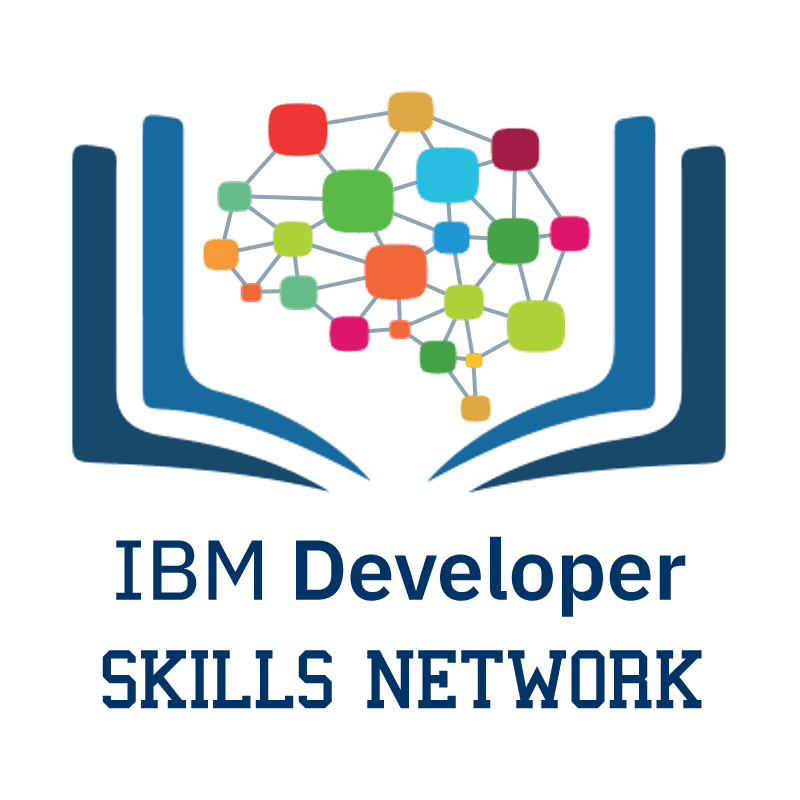

In [21]:
Image.open(path)

In [22]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/Example1.txt'
path=os.path.join(os.getcwd(),'example1.txt')
r=requests.get(url)
with open(path,'wb') as f:
    f.write(r.content)

### Get Request with URL Parameters

In [23]:
url_get='http://httpbin.org/get'

In [24]:
payload={"name":"Joseph","ID":"123"}

In [25]:
r = requests.get(url_get, params = payload)

**We can print out the URL and see the name and values**

In [26]:
r.url

'http://httpbin.org/get?name=Joseph&ID=123'

In [27]:
# There is no request body
print("request body:", r.request.body)

request body: None


**We can print out the status code**

In [28]:
r.status_code

200

**We can view the response as text:**

In [29]:
r.text

'{\n  "args": {\n    "ID": "123", \n    "name": "Joseph"\n  }, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.25.1", \n    "X-Amzn-Trace-Id": "Root=1-61628668-6594f2730a1ceaf71c32b2b6"\n  }, \n  "origin": "175.107.235.34", \n  "url": "http://httpbin.org/get?name=Joseph&ID=123"\n}\n'

**We can look at the 'Content-Type'.**

In [30]:
r.headers["Content-Type"]

'application/json'

**It returns a Python dict**

In [31]:
r.json()

{'args': {'ID': '123', 'name': 'Joseph'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.25.1',
  'X-Amzn-Trace-Id': 'Root=1-61628668-6594f2730a1ceaf71c32b2b6'},
 'origin': '175.107.235.34',
 'url': 'http://httpbin.org/get?name=Joseph&ID=123'}

In [32]:
r.json()["args"]

{'ID': '123', 'name': 'Joseph'}

### Post Requests 

In [33]:
url_post='http://httpbin.org/post'

In [34]:
r_post=requests.post(url_post,data=payload)

In [35]:
print("POST request URL:",r_post.url )
print("GET request URL:",r.url)

POST request URL: http://httpbin.org/post
GET request URL: http://httpbin.org/get?name=Joseph&ID=123


**We can view the form as well:**

In [36]:
r_post.json()["form"]

{'ID': '123', 'name': 'Joseph'}

### Web Scrapping

In [39]:
%%html
<!DOCTYPE html>
<html>
<head>
<title>Page Title</title>
</head>
<body>
<h3><b id='boldest'>Lebron James</b></h3>
<p> Salary: $ 92,000,000 </p>
<h3> Stephen Curry</h3>
<p> Salary: $85,000, 000 </p>
<h3> Kevin Durant </h3>
<p> Salary: $73,200, 000</p>
</body>
</html>

In [40]:
html="<!DOCTYPE html><html><head><title>Page Title</title></head><body><h3><b id='boldest'>Lebron James</b></h3><p> Salary: $ 92,000,000 </p><h3> Stephen Curry</h3><p> Salary: $85,000, 000 </p><h3> Kevin Durant </h3><p> Salary: $73,200, 000</p></body></html>"

**Beautiful Soup Object**

In [41]:
soup = BeautifulSoup(html, 'html5lib')

**prettify() display the HTML in the nested structure**

In [42]:
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Page Title
  </title>
 </head>
 <body>
  <h3>
   <b id="boldest">
    Lebron James
   </b>
  </h3>
  <p>
   Salary: $ 92,000,000
  </p>
  <h3>
   Stephen Curry
  </h3>
  <p>
   Salary: $85,000, 000
  </p>
  <h3>
   Kevin Durant
  </h3>
  <p>
   Salary: $73,200, 000
  </p>
 </body>
</html>


**Display Title**

In [44]:
tag_object = soup.title
print(tag_object)

<title>Page Title</title>


**Display Player**

In [46]:
tag_object = soup.h3
tag_object

<h3><b id="boldest">Lebron James</b></h3>

### Children, Parents, and Siblings

In [47]:
tag_child = soup.h3.b
tag_child

<b id="boldest">Lebron James</b>

In [51]:
sibling1 = soup.h3.next_sibling
sibling1

<p> Salary: $ 92,000,000 </p>

**sibling_2 is the header element which is also a sibling of both sibling_1 and tag_object**

In [53]:
sibling2=sibling1.next_sibling
sibling2

<h3> Stephen Curry</h3>

In [54]:
sibling3=sibling2.next_sibling
sibling3

<p> Salary: $85,000, 000 </p>

### HTML Attributes

**Value**

In [59]:
soup.h3.b["id"]

'boldest'

**Attribute**

In [62]:
soup.h3.b.attrs

{'id': 'boldest'}

**Get the text**

In [66]:
soup.h3.string

'Lebron James'

### Filter

In [67]:
%%html
<table>
  <tr>
    <td id='flight' >Flight No</td>
    <td>Launch site</td> 
    <td>Payload mass</td>
   </tr>
  <tr> 
    <td>1</td>
    <td><a href='https://en.wikipedia.org/wiki/Florida'>Florida</a></td>
    <td>300 kg</td>
  </tr>
  <tr>
    <td>2</td>
    <td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td>
    <td>94 kg</td>
  </tr>
  <tr>
    <td>3</td>
    <td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a> </td>
    <td>80 kg</td>
  </tr>
</table>

Flight No,Launch site,Payload mass
1,Florida,300 kg
2,Texas,94 kg
3,Florida,80 kg


**Store as a string**

In [68]:
table="<table><tr><td id='flight'>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr> <td>1</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a></td><td>300 kg</td></tr><tr><td>2</td><td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td><td>94 kg</td></tr><tr><td>3</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a> </td><td>80 kg</td></tr></table>"

In [69]:
table_bs = BeautifulSoup(table, 'html5lib')

**Table tags**

In [70]:
table_rows=table_bs.find_all('tr')
table_rows

[<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>,
 <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a></a></td><td>300 kg</td></tr>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td><td>80 kg</td></tr>]

In [71]:
first_row =table_rows[0]
first_row

<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>

In [72]:
first_row.td

<td id="flight">Flight No</td>

In [73]:
for i,row in enumerate(table_rows):
    print("row",i,"is",row)

row 0 is <tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>
row 1 is <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a></a></td><td>300 kg</td></tr>
row 2 is <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>
row 3 is <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td><td>80 kg</td></tr>


In [74]:
for i,row in enumerate(table_rows):
    print("row",i)
    cells=row.find_all('td')
    for j,cell in enumerate(cells):
        print('colunm',j,"cell",cell)

row 0
colunm 0 cell <td id="flight">Flight No</td>
colunm 1 cell <td>Launch site</td>
colunm 2 cell <td>Payload mass</td>
row 1
colunm 0 cell <td>1</td>
colunm 1 cell <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a></a></td>
colunm 2 cell <td>300 kg</td>
row 2
colunm 0 cell <td>2</td>
colunm 1 cell <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td>
colunm 2 cell <td>94 kg</td>
row 3
colunm 0 cell <td>3</td>
colunm 1 cell <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td>
colunm 2 cell <td>80 kg</td>


In [75]:
list_input=table_bs .find_all(name=["tr", "td"])
list_input

[<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>,
 <td id="flight">Flight No</td>,
 <td>Launch site</td>,
 <td>Payload mass</td>,
 <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a></a></td><td>300 kg</td></tr>,
 <td>1</td>,
 <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a></a></td>,
 <td>300 kg</td>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <td>2</td>,
 <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td>,
 <td>94 kg</td>,
 <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td><td>80 kg</td></tr>,
 <td>3</td>,
 <td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td>,
 <td>80 kg</td>]

### Attributes

In [76]:
table_bs.find_all(id="flight")

[<td id="flight">Flight No</td>]

**We can find all the elements that have links to the Florida Wikipedia page:**

In [77]:
list_input= table_bs.find_all(href="https://en.wikipedia.org/wiki/Florida")
list_input

[<a href="https://en.wikipedia.org/wiki/Florida">Florida</a>,
 <a href="https://en.wikipedia.org/wiki/Florida">Florida</a>]

In [78]:
table_bs.find_all(href=True)

[<a href="https://en.wikipedia.org/wiki/Florida">Florida</a>,
 <a href="https://en.wikipedia.org/wiki/Texas">Texas</a>,
 <a href="https://en.wikipedia.org/wiki/Florida">Florida</a>]

In [80]:
table_bs.find_all(href = False)

[<html><head></head><body><table><tbody><tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a></a></td><td>300 kg</td></tr><tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr><tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td><td>80 kg</td></tr></tbody></table></body></html>,
 <head></head>,
 <body><table><tbody><tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a></a></td><td>300 kg</td></tr><tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr><tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td><td>80 kg</td></tr></tbody></table></body>,
 <table><tbody><tr><td id="flight">Flight No</td><td>Launch site</td> <t

In [83]:
table_bs.find_all(string="Florida")

['Florida', 'Florida']

### Find

In [84]:
%%html
<h3>Rocket Launch </h3>

<p>
<table class='rocket'>
  <tr>
    <td>Flight No</td>
    <td>Launch site</td> 
    <td>Payload mass</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Florida</td>
    <td>300 kg</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Texas</td>
    <td>94 kg</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Florida </td>
    <td>80 kg</td>
  </tr>
</table>
</p>
<p>

<h3>Pizza Party  </h3>
  
    
<table class='pizza'>
  <tr>
    <td>Pizza Place</td>
    <td>Orders</td> 
    <td>Slices </td>
   </tr>
  <tr>
    <td>Domino's Pizza</td>
    <td>10</td>
    <td>100</td>
  </tr>
  <tr>
    <td>Little Caesars</td>
    <td>12</td>
    <td >144 </td>
  </tr>
  <tr>
    <td>Papa John's </td>
    <td>15 </td>
    <td>165</td>
  </tr>


Flight No,Launch site,Payload mass
1,Florida,300 kg
2,Texas,94 kg
3,Florida,80 kg
Pizza Place,Orders,Slices
Domino's Pizza,10,100
Little Caesars,12,144
Papa John's,15,165


**We store the HTML as a Python string and assign two_tables**

In [85]:
two_tables="<h3>Rocket Launch </h3><p><table class='rocket'><tr><td>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr><td>1</td><td>Florida</td><td>300 kg</td></tr><tr><td>2</td><td>Texas</td><td>94 kg</td></tr><tr><td>3</td><td>Florida </td><td>80 kg</td></tr></table></p><p><h3>Pizza Party  </h3><table class='pizza'><tr><td>Pizza Place</td><td>Orders</td> <td>Slices </td></tr><tr><td>Domino's Pizza</td><td>10</td><td>100</td></tr><tr><td>Little Caesars</td><td>12</td><td >144 </td></tr><tr><td>Papa John's </td><td>15 </td><td>165</td></tr>"

**We create a BeautifulSoup object two_tables_bs**

In [86]:
two_tables_bs = BeautifulSoup(two_tables, "html.parser")

**We can find the first table using the tag name table**

In [87]:
two_tables_bs.find("table")

<table class="rocket"><tr><td>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr><td>1</td><td>Florida</td><td>300 kg</td></tr><tr><td>2</td><td>Texas</td><td>94 kg</td></tr><tr><td>3</td><td>Florida </td><td>80 kg</td></tr></table>

In [88]:
two_tables_bs.find("table", class_ = "pizza")

<table class="pizza"><tr><td>Pizza Place</td><td>Orders</td> <td>Slices </td></tr><tr><td>Domino's Pizza</td><td>10</td><td>100</td></tr><tr><td>Little Caesars</td><td>12</td><td>144 </td></tr><tr><td>Papa John's </td><td>15 </td><td>165</td></tr></table>

### Downloading And Scraping The Contents Of A Web Page

In [89]:
url = "http://www.ibm.com"

**We use get to download the contents of the webpage in text format and store in a variable called data:**

In [91]:
soup = BeautifulSoup(data,"html5lib")

**Scrape all links**

In [92]:
for link in soup.find_all('a',href=True):  # in html anchor/link is represented by the tag <a>

    print(link.get('href'))

https://www.ibm.com/pk/en
https://www.ibm.com/sitemap/pk/en
https://www.ibm.com/ae-en/events/think-summit?lnk=aehpv18l1
https://newsroom.ibm.com/2021-02-16-IBM-Commits-To-Net-Zero-Greenhouse-Gas-Emissions-By-2030?lnk=hpv18nf1
https://www.ibm.com/training/cloud?aehpv18f1=
https://www.ibm.com/ae-en/cloud/cloud-pak-for-automation?lnk=aehpv18f2
https://www.ibm.com/ae-en/it-infrastructure/storage/hybrid-cloud-storage?lnk=aehpv18l3
https://www.ibm.com/ae-en/cloud/cloud-pak-for-watson-aiops?lnk=aehpv18f4
/products/offers-and-discounts?lnk=hpv18t5
https://www.ibm.com/ae-en/products/db2-database?lnk=STW_AE_HPT_T1_BLK&lnk2=trial_Db2Database&psrc=none&pexp=def
https://www.ibm.com/ae-en/products/verify-access?lnk=STW_AE_HPT_T2_BLK&lnk2=trial_Verify&psrc=none&pexp=def
https://www.ibm.com/ae-en/cloud/cloud-pak-for-automation?lnk=STW_AE_HPT_T3_BLK&lnk2=trial_CloudPakAtm&psrc=none&pexp=def
https://www.ibm.com/ae-en/cloud/watson-assistant?lnk=STW_AE_HPT_T4_BLK&lnk2=trial_WatAssist&psrc=none&pexp=def
ht

### Scrape all images Tags

In [93]:
for link in soup.find_all('img'):# in html image is represented by the tag <img>
    print(link)
    print(link.get('src'))

<img alt="Illustration for IBM Cloud Certifications" class="" loading="lazy" src="//1.cms.s81c.com/sites/default/files/2021-05-05/cloud_1.jpg"/>
//1.cms.s81c.com/sites/default/files/2021-05-05/cloud_1.jpg
<img alt="A laptop on a desk displaying a use case for IBM Cloud Pak for Business Automation" class="" loading="lazy" src="//1.cms.s81c.com/sites/default/files/2021-04-07/cloud-pak-for-business-automation_0_0.jpg"/>
//1.cms.s81c.com/sites/default/files/2021-04-07/cloud-pak-for-business-automation_0_0.jpg
<img alt="Man standing in a server room" class="" loading="lazy" src="//1.cms.s81c.com/sites/default/files/2021-04-12/GettyImages-802301352-servers-444x252_0.jpg"/>
//1.cms.s81c.com/sites/default/files/2021-04-12/GettyImages-802301352-servers-444x252_0.jpg
<img alt="Isometric illustration displaying AI operations" class="" loading="lazy" src="//1.cms.s81c.com/sites/default/files/2021-04-07/AIops-444x254.jpg"/>
//1.cms.s81c.com/sites/default/files/2021-04-07/AIops-444x254.jpg
<img alt=

**Scrape data from HTML tables**

In [94]:
#The below url contains an html table with data about colors and color codes.
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/HTMLColorCodes.html"

In [96]:
# get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url).text
soup = BeautifulSoup(data,"html5lib")

In [97]:
#find a html table in the web page
table = soup.find('table') # in html table is represented by the tag <table>

In [98]:
#Get all rows from the table
for row in table.find_all('tr'): # in html table row is represented by the tag <tr>
    # Get all columns in each row.
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    color_name = cols[2].string # store the value in column 3 as color_name
    color_code = cols[3].string # store the value in column 4 as color_code
    print("{}--->{}".format(color_name,color_code))

Color Name--->None
lightsalmon--->#FFA07A
salmon--->#FA8072
darksalmon--->#E9967A
lightcoral--->#F08080
coral--->#FF7F50
tomato--->#FF6347
orangered--->#FF4500
gold--->#FFD700
orange--->#FFA500
darkorange--->#FF8C00
lightyellow--->#FFFFE0
lemonchiffon--->#FFFACD
papayawhip--->#FFEFD5
moccasin--->#FFE4B5
peachpuff--->#FFDAB9
palegoldenrod--->#EEE8AA
khaki--->#F0E68C
darkkhaki--->#BDB76B
yellow--->#FFFF00
lawngreen--->#7CFC00
chartreuse--->#7FFF00
limegreen--->#32CD32
lime--->#00FF00
forestgreen--->#228B22
green--->#008000
powderblue--->#B0E0E6
lightblue--->#ADD8E6
lightskyblue--->#87CEFA
skyblue--->#87CEEB
deepskyblue--->#00BFFF
lightsteelblue--->#B0C4DE
dodgerblue--->#1E90FF


### Scrape data from HTML tables into a DataFrame using BeautifulSoup and Pandas

In [99]:
url = "https://en.wikipedia.org/wiki/World_population"

In [100]:
data  = requests.get(url).text
soup = BeautifulSoup(data,"html5lib")

In [101]:
#find all html tables in the web page
tables = soup.find_all('table') # in html table is represented by the tag <table>

In [102]:
for index,table in enumerate(tables):
    if ("10 most densely populated countries" in str(table)):
        table_index = index
print(table_index)

5


In [103]:
print(tables[table_index].prettify())

<table class="wikitable sortable" style="text-align:right">
 <caption>
  10 most densely populated countries
  <small>
   (with population above 5 million)
  </small>
 </caption>
 <tbody>
  <tr>
   <th>
    Rank
   </th>
   <th>
    Country
   </th>
   <th>
    Population
   </th>
   <th>
    Area
    <br/>
    <small>
     (km
     <sup>
      2
     </sup>
     )
    </small>
   </th>
   <th>
    Density
    <br/>
    <small>
     (pop/km
     <sup>
      2
     </sup>
     )
    </small>
   </th>
  </tr>
  <tr>
   <td>
    1
   </td>
   <td align="left">
    <span class="flagicon">
     <img alt="" class="thumbborder" data-file-height="3456" data-file-width="5184" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Singapore.svg/23px-Flag_of_Singapore.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Singapore.svg/35px-Flag_of_Singapore.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Singa

In [104]:
population_data = pd.DataFrame(columns=["Rank", "Country", "Population", "Area", "Density"])

for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        rank = col[0].text
        country = col[1].text
        population = col[2].text.strip()
        area = col[3].text.strip()
        density = col[4].text.strip()
        population_data = population_data.append({"Rank":rank, "Country":country, "Population":population, "Area":area, "Density":density}, ignore_index=True)

population_data

,Rank,Country,Population,Area,Density
0,1,Singapore,"5,704,000",710,"8,033"
1,2,Bangladesh,"171,500,000","143,998","1,191"
2,3,Lebanon,"6,856,000","10,452",656
3,4,Taiwan,"23,604,000","36,193",652
4,5,South Korea,"51,781,000","99,538",520
5,6,Rwanda,"12,374,000","26,338",470
6,7,Haiti,"11,578,000","27,065",428
7,8,Netherlands,"17,650,000","41,526",425
8,9,Israel,"9,410,000","22,072",426
9,10,India,"1,382,920,000","3,287,240",421


### Scrape data from HTML tables into a DataFrame using BeautifulSoup and read_html

In [105]:
pd.read_html(str(tables[5]), flavor='bs4')

[   Rank      Country  Population  Area(km2)  Density(pop/km2)
 0     1    Singapore     5704000        710              8033
 1     2   Bangladesh   171500000     143998              1191
 2     3      Lebanon     6856000      10452               656
 3     4       Taiwan    23604000      36193               652
 4     5  South Korea    51781000      99538               520
 5     6       Rwanda    12374000      26338               470
 6     7        Haiti    11578000      27065               428
 7     8  Netherlands    17650000      41526               425
 8     9       Israel     9410000      22072               426
 9    10        India  1382920000    3287240               421]

In [106]:
population_data_read_html = pd.read_html(str(tables[5]), flavor='bs4')[0]

population_data_read_html

,Rank,Country,Population,Area(km2),Density(pop/km2)
0,1,Singapore,5704000,710,8033
1,2,Bangladesh,171500000,143998,1191
2,3,Lebanon,6856000,10452,656
3,4,Taiwan,23604000,36193,652
4,5,South Korea,51781000,99538,520
5,6,Rwanda,12374000,26338,470
6,7,Haiti,11578000,27065,428
7,8,Netherlands,17650000,41526,425
8,9,Israel,9410000,22072,426
9,10,India,1382920000,3287240,421


### Scrape data from HTML tables into a DataFrame using read_html"

In [110]:
dataframe_list = pd.read_html(url, flavor='bs4')
dataframe_list[5]

,Rank,Country,Population,Area(km2),Density(pop/km2)
0,1,Singapore,5704000,710,8033
1,2,Bangladesh,171500000,143998,1191
2,3,Lebanon,6856000,10452,656
3,4,Taiwan,23604000,36193,652
4,5,South Korea,51781000,99538,520
5,6,Rwanda,12374000,26338,470
6,7,Haiti,11578000,27065,428
7,8,Netherlands,17650000,41526,425
8,9,Israel,9410000,22072,426
9,10,India,1382920000,3287240,421


**We can also use the match parameter to select the specific table we want. If the table contains a string matching the text it will be read.**

In [111]:
pd.read_html(url, match="10 most densely populated countries", flavor='bs4')[0]

,Rank,Country,Population,Area(km2),Density(pop/km2)
0,1,Singapore,5704000,710,8033
1,2,Bangladesh,171500000,143998,1191
2,3,Lebanon,6856000,10452,656
3,4,Taiwan,23604000,36193,652
4,5,South Korea,51781000,99538,520
5,6,Rwanda,12374000,26338,470
6,7,Haiti,11578000,27065,428
7,8,Netherlands,17650000,41526,425
8,9,Israel,9410000,22072,426
9,10,India,1382920000,3287240,421
